In [2]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import Ridge
import numpy as np
from collections import Counter
import imblearn
from sklearn.preprocessing import LabelBinarizer
from imblearn.over_sampling import SMOTE
import scikitplot as skplt
from imblearn.pipeline import make_pipeline as make_pipeline_imb
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier,AdaBoostClassifier,RandomForestClassifier,ExtraTreesClassifier,GradientBoostingClassifier,GradientBoostingRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import VarianceThreshold
from sklearn import datasets 
from sklearn.naive_bayes import GaussianNB 
import xgboost as xgb 
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.decomposition import PCA
from sklearn.tree import export_graphviz
from sklearn import tree
from sklearn.pipeline import make_pipeline
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, accuracy_score 
from sklearn.metrics import plot_confusion_matrix
from sklearn import metrics
from sklearn.decomposition import TruncatedSVD
from sklearn.svm import SVC 
import sklearn
from multi_imbalance.resampling.mdo import MDO 
from sklearn.model_selection import validation_curve
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score,confusion_matrix,classification_report,make_scorer,average_precision_score,precision_recall_curve,recall_score,precision_score

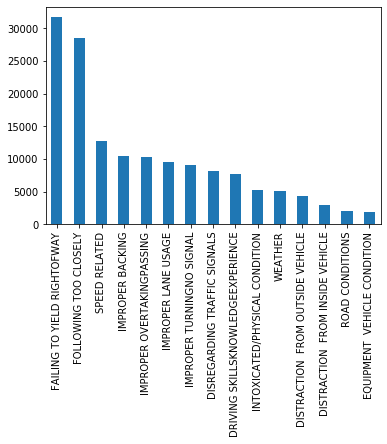

In [7]:
dx = pd.read_csv('dx.csv')
dx.PRIM_CONTRIBUTORY_CAUSE.value_counts().plot(kind='bar')


In [3]:
def multiclass_roc_auc_score(y_test, y_pred, average="micro"):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)
    return roc_auc_score(y_test, y_pred, average=average)


In [4]:
def plot_confusion_matrix(cm, names, title='Confusion matrix', 
                            cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(names))
    plt.xticks(tick_marks, names, rotation=45)
    plt.yticks(tick_marks, names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    

In [5]:
def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.figure(figsize=(15,15))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), X_train.columns.values) 
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')
    

In [7]:
dx.PRIM_CONTRIBUTORY_CAUSE.value_counts()

FAILING TO YIELD RIGHTOFWAY                       31696
FOLLOWING TOO CLOSELY                             28515
SPEED RELATED                                     12790
IMPROPER BACKING                                  10458
IMPROPER OVERTAKINGPASSING                        10278
IMPROPER LANE USAGE                                9536
IMPROPER TURNINGNO SIGNAL                          9078
DISREGARDING TRAFFIC SIGNALS                       8098
DRIVING SKILLSKNOWLEDGEEXPERIENCE                  7706
INTOXICATED/PHYSICAL CONDITION                     5199
WEATHER                                            5144
DISTRACTION  FROM INSIDE VEHICLE                   2997
DISTRACTION  FROM OUTSIDE VEHICLE                  2284
ROAD CONDITIONS                                    2004
VISION OBSCURED SIGNS TREE LIMBS BUILDINGS ETC     1992
EQUIPMENT  VEHICLE CONDITION                       1912
Name: PRIM_CONTRIBUTORY_CAUSE, dtype: int64

C:\Users\jrizz_000\anaconda3\anaconda3\envs\learn-env\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\jrizz_000\anaconda3\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Accuracy: 
AUC : 0.7967406449519484


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

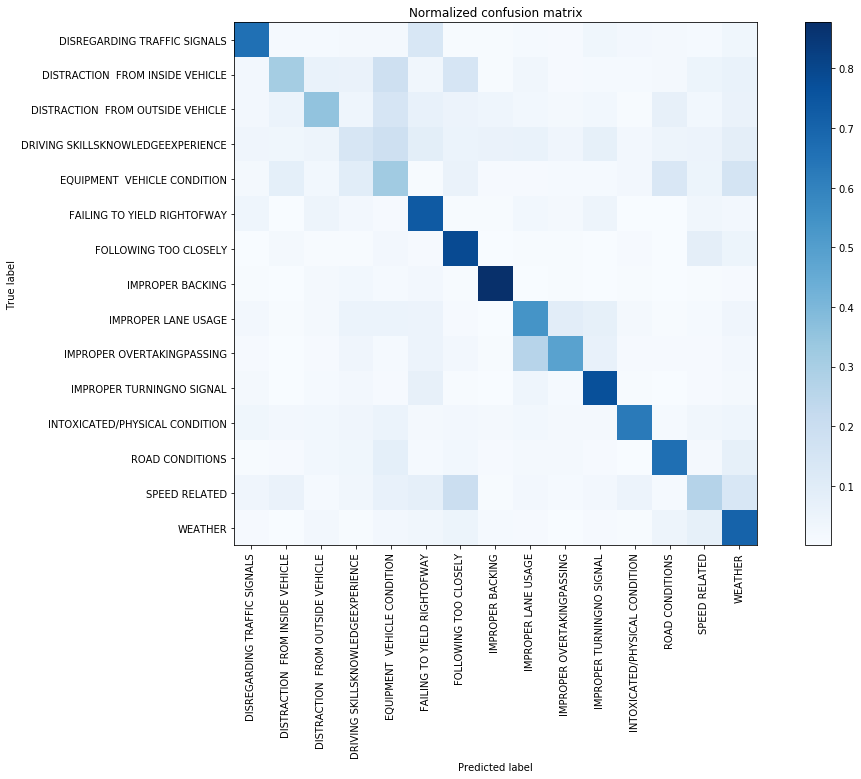

In [9]:
## LOGREG with SMOTE ##

smote =SMOTE(k_neighbors=2)
dx.drop(dx.columns[dx.columns.str.contains('unnamed', case = False)],axis = 1, inplace = True)


CL = ['PRIM_CONTRIBUTORY_CAUSE','DRIVER_VISION', 'DRIVER_ACTION','POSTED_SPEED_LIMIT', 'AGE', 'PHYSICAL_CONDITION',
       'ROADWAY_SURFACE_COND','DEVICE_CONDITION','FIRST_CRASH_TYPE']

d = dx[CL]
dm = d

dd=pd.get_dummies(dm, columns= ['DRIVER_VISION', 'DRIVER_ACTION','PHYSICAL_CONDITION',
       'ROADWAY_SURFACE_COND','DEVICE_CONDITION','FIRST_CRASH_TYPE'], drop_first=True)

X = dd.drop(['PRIM_CONTRIBUTORY_CAUSE'], axis=1)
y = dd[['PRIM_CONTRIBUTORY_CAUSE']] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=42)

scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)



X_train, y_train = smote.fit_sample(X_train, y_train)

## Logreg with SMOTE ##

feature_selection=PCA()
clf=LogisticRegression(random_state=42, solver='lbfgs', multi_class='multinomial')

logreg = make_pipeline_imb(feature_selection,clf)
log = logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)


acc_logreg = round(accuracy_score(y_pred, y_test) * 100, 2)
print('Accuracy: {} '.format(acc_logreg))
print('AUC : {}'.format(multiclass_roc_auc_score(y_test, y_pred)))
cm = confusion_matrix(y_test, y_pred) 

dummies = pd.get_dummies(dx['PRIM_CONTRIBUTORY_CAUSE']) # Classification
name = dummies.columns

#Normalized CM
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(15, 10))
plot_confusion_matrix(cm_normalized, name,title='Normalized confusion matrix')
plt.xticks(rotation=90)

# Logreg Testing

Log Loss: 13.086156077475865
AUC: 0.7970269509366978


C:\Users\jrizz_000\anaconda3\anaconda3\envs\learn-env\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


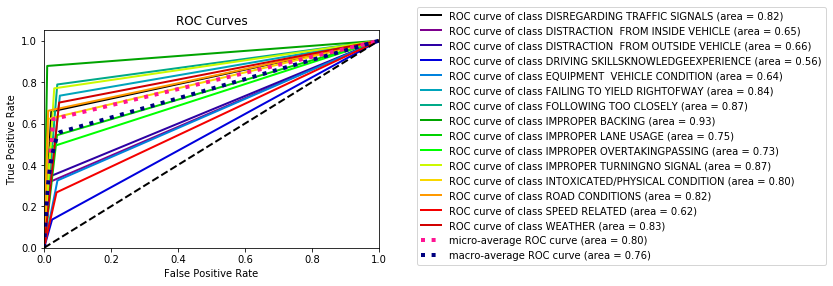

In [24]:
y_predi = logreg.predict(X_test)
y_testi = y_test
lb = LabelBinarizer()
lb.fit(y_predi)
y_predi = lb.transform(y_pred)

print('Log Loss: {}'.format(metrics.log_loss(y_testi, y_predi)))

print('AUC: {}'.format(multiclass_roc_auc_score(y_test, y_pred)))

skplt.metrics.plot_roc_curve(y_testi, y_predi)
plt.legend(loc='lower left', bbox_to_anchor=(1.1, -0.1), ncol=1, fancybox=True)
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(15, 10))
plot_confusion_matrix(cm_normalized, name,title='Normalized confusion matrix')
print_metrics(y_testi,y_predi)

C:\Users\jrizz_000\anaconda3\anaconda3\envs\learn-env\lib\site-packages\imblearn\pipeline.py:281: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, yt, **fit_params)


61.73


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

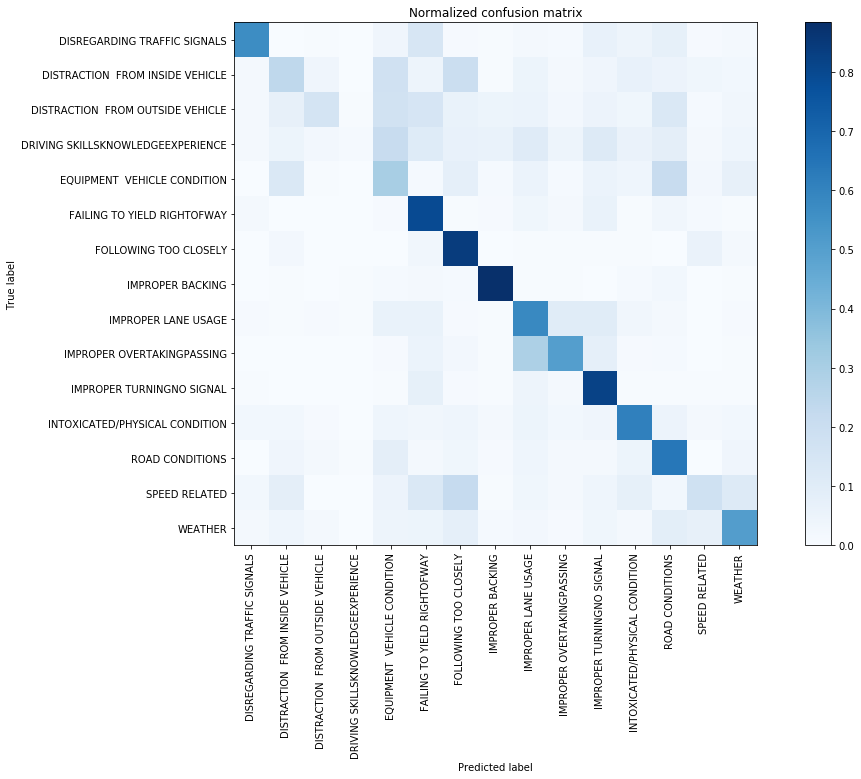

In [28]:
## RF with SMOTE ##

feature_selection=VarianceThreshold()
clf=RandomForestClassifier(max_depth=7, n_estimators=250, random_state=42)

rand = make_pipeline_imb(feature_selection,clf)
rand = rand.fit(X_train, y_train)
y_pred = rand.predict(X_test)


acc_rand = round(accuracy_score(y_pred, y_test) * 100, 2)
print('Accuracy: {} '.format(acc_rand))
print('AUC : {}'.format(multiclass_roc_auc_score(y_test, y_pred)))
cm = confusion_matrix(y_test, y_pred) 
dummies = pd.get_dummies(dx['PRIM_CONTRIBUTORY_CAUSE']) # Classification
name = dummies.columns

#Normalized CM
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(15, 10))
plot_confusion_matrix(cm_normalized, name,title='Normalized confusion matrix')
plt.xticks(rotation=90)

# Random Forest Testing

Log Loss: 12.97655678034457
AUC: 0.7976947229402305


C:\Users\jrizz_000\anaconda3\anaconda3\envs\learn-env\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


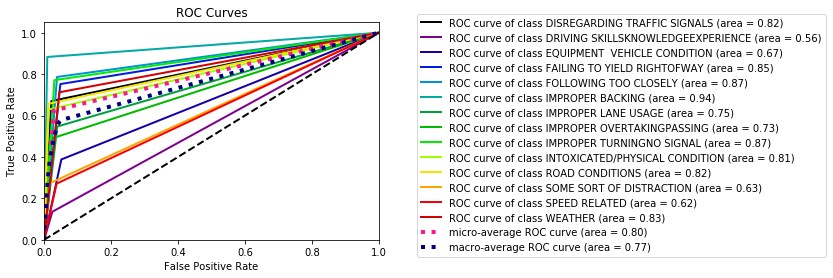

In [20]:
y_predi = rand.predict(X_test)
y_testi = y_test
lb = LabelBinarizer()
lb.fit(y_predi)
y_predi = lb.transform(y_pred)

print('Log Loss: {}'.format(metrics.log_loss(y_testi, y_predi)))
#multiclass loss

print('AUC: {}'.format(multiclass_roc_auc_score(y_test, y_pred)))

skplt.metrics.plot_roc_curve(y_testi, y_predi)
plt.legend(loc='lower left', bbox_to_anchor=(1.1, -0.1), ncol=1, fancybox=True)
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(15, 10))
plot_confusion_matrix(cm_normalized, name,title='Normalized confusion matrix')
print_metrics(y_testi,y_predi)

In [ ]:
## SVC ##
feature_selection=PCA()
clf=SVC(kernel = 'linear', C = 1, gamma ='scale', class_weight = 'balanced')

svc = make_pipeline(feature_selection,clf)
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)


acc_svc = round(accuracy_score(y_pred, y_test) * 100, 2)
print('Accuracy: {} '.format(acc_svc))
print('AUC : {}'.format(multiclass_roc_auc_score(y_test, y_pred)))

cm = confusion_matrix(y_test, y_pred) 
dummies = pd.get_dummies(dx['PRIM_CONTRIBUTORY_CAUSE']) # Classification
name = dummies.columns

#Normalized CM
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(15, 10))
plot_confusion_matrix(cm_normalized, name,title='Normalized confusion matrix')
plt.xticks(rotation=90)

C:\Users\jrizz_000\anaconda3\anaconda3\envs\learn-env\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [ ]:
plot_feature_importances(xgb_best_smote[1])

# SVM Testing

In [ ]:
y_predi = logreg.predict(X_test)
y_testi = y_test
lb = LabelBinarizer()
lb.fit(y_predi)
y_predi = lb.transform(y_pred)

print('Log Loss: {}'.format(metrics.log_loss(y_testi, y_predi)))

print('AUC: {}'.format(multiclass_roc_auc_score(y_test, y_pred)))

skplt.metrics.plot_roc_curve(y_testi, y_predi)
plt.legend(loc='lower left', bbox_to_anchor=(1.1, -0.1), ncol=1, fancybox=True)
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(15, 10))
plot_confusion_matrix(cm_normalized, name,title='Normalized confusion matrix')
print_metrics(y_testi,y_predi)

In [8]:

smote =SMOTE(k_neighbors=2)
dx.drop(dx.columns[dx.columns.str.contains('unnamed', case = False)],axis = 1, inplace = True)


CL = ['PRIM_CONTRIBUTORY_CAUSE','DRIVER_VISION', 'DRIVER_ACTION','POSTED_SPEED_LIMIT', 'AGE', 'PHYSICAL_CONDITION',
       'ROADWAY_SURFACE_COND','DEVICE_CONDITION','FIRST_CRASH_TYPE']

d = dx[CL]
dm = d

dd=pd.get_dummies(dm, columns= ['DRIVER_VISION', 'DRIVER_ACTION','PHYSICAL_CONDITION',
       'ROADWAY_SURFACE_COND','DEVICE_CONDITION','FIRST_CRASH_TYPE'], drop_first=True)

X = dd.drop(['PRIM_CONTRIBUTORY_CAUSE'], axis=1)
y = dd[['PRIM_CONTRIBUTORY_CAUSE']] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=42)

scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)



X_train, y_train = smote.fit_sample(X_train, y_train)


C:\Users\jrizz_000\anaconda3\anaconda3\envs\learn-env\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Accuracy: 62.46 
AUC : 0.7988700457135222


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

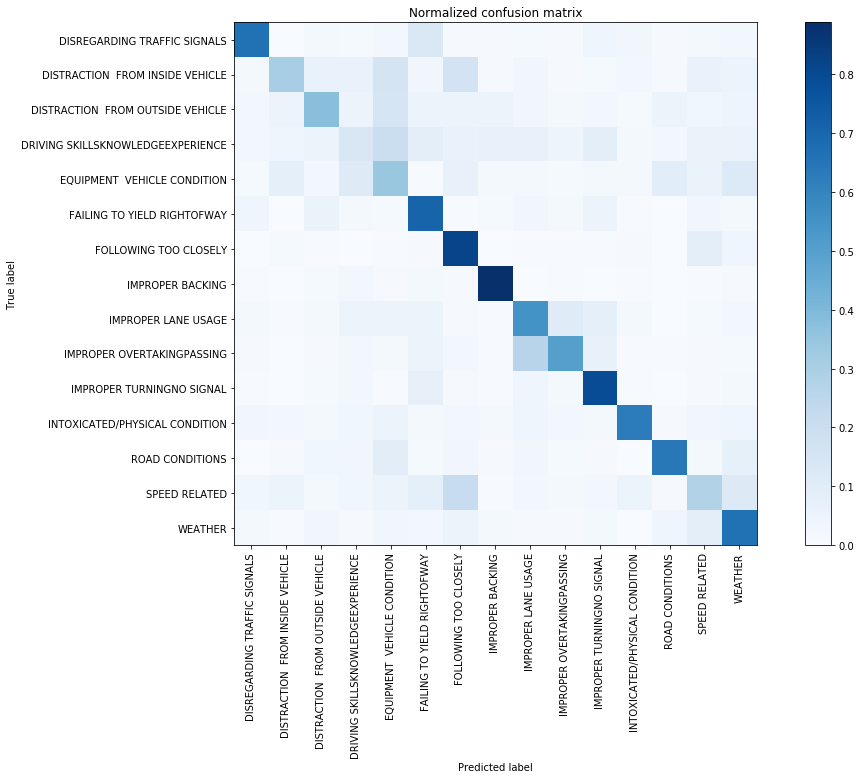

In [9]:
## X Boosting ##
feature_selection=PCA()
clf= xgb.XGBClassifier(objective='binary:logistic', random_state=42, max_depth=3, gamma=1)

xgb = make_pipeline_imb(feature_selection,clf)
xgb = xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)

acc_xgb = round(accuracy_score(y_pred, y_test) * 100, 2)
print('Accuracy: {} '.format(acc_xgb))
print('AUC : {}'.format(multiclass_roc_auc_score(y_test, y_pred)))

cm = confusion_matrix(y_test, y_pred) 
dummies = pd.get_dummies(dx['PRIM_CONTRIBUTORY_CAUSE']) # Classification
name = dummies.columns

#Normalized CM
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(15, 10))
plot_confusion_matrix(cm_normalized, name,title='Normalized confusion matrix')
plt.xticks(rotation=90)

In [15]:
def metricsscors(labels, preds):
    print("Precision Score: {}".format(precision_score(labels, preds,average='micro')))
    print("Recall Score: {}".format(recall_score(labels, preds,average='micro')))
    print("Accuracy Score: {}".format(accuracy_score(labels, preds)))
    print("F1 Score: {}".format(f1_score(labels, preds,average='micro')))

In [16]:
metricsscors( y_test, y_pred)

Precision Score: 0.6245574186652415
Recall Score: 0.6245574186652415
Accuracy Score: 0.6245574186652415
F1 Score: 0.6245574186652415


# X Boosting Testing

Log Loss: 12.967327365849307
AUC: 0.7988700457135222


C:\Users\jrizz_000\anaconda3\anaconda3\envs\learn-env\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


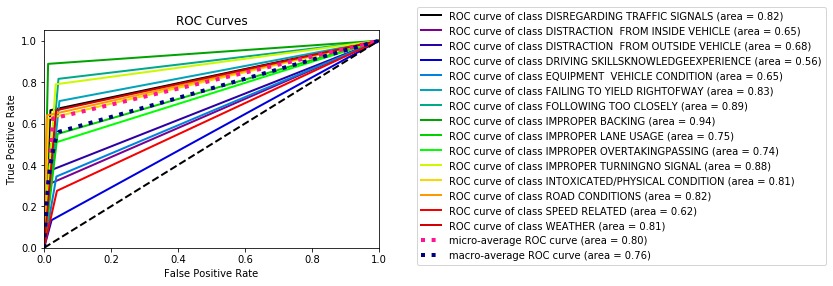

In [10]:
y_predi = xgb.predict(X_test)
y_testi = y_test
lb = LabelBinarizer()
lb.fit(y_predi)
y_predi = lb.transform(y_pred)

print('Log Loss: {}'.format(metrics.log_loss(y_testi, y_predi)))

print('AUC: {}'.format(multiclass_roc_auc_score(y_test, y_pred)))

skplt.metrics.plot_roc_curve(y_testi, y_predi)
plt.legend(loc='lower left', bbox_to_anchor=(1.1, -0.1), ncol=1, fancybox=True)
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(15, 10))
plot_confusion_matrix(cm_normalized, name,title='Normalized confusion matrix')
print_metrics(y_testi,y_predi)

In [1]:
xgb.save("xgb.h5")


NameError: name 'xgb' is not defined